<a href="https://colab.research.google.com/github/widyadaridhyp/Airline-Customer-Value-Analysis/blob/main/HW_WEEK_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Airline-Customer-Value-Analysis/main/flight.csv')

df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in df.columns]

# Apply the new column names
df.columns = new_cols

In [ ]:
df.sample(5)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
59216,28715,4/11/2012,9/20/2012,Male,4,baoji,shanxi,CN,45.0,3/31/2014,...,0.0,2412,9/24/2012,555,4.00,4,0,0.575000,850,0
58893,23797,9/2/2011,11/30/2013,Female,4,shanghai,shanghai,CN,31.0,3/31/2014,...,1378.0,2195,3/3/2014,29,94.00,94,0,0.656852,1524,0
45516,25512,1/27/2013,1/27/2013,Male,4,wulumuqi,xinjiang,CN,37.0,3/31/2014,...,1132.0,4170,10/14/2013,170,52.00,109,0,0.846489,3097,0
40427,61060,11/1/2012,11/1/2012,Male,4,dalian,liaoning,CN,28.0,3/31/2014,...,3930.0,6695,1/27/2014,65,113.00,395,0,0.680233,3676,0
20755,57167,4/11/2008,4/21/2008,Male,4,shenzhen,guangdong,CN,59.0,3/31/2014,...,3816.0,18693,1/26/2014,66,68.75,275,0,0.631111,9045,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

#Merubah tipe data

In [ ]:
#merubah tipe data menjadi datetime pada kolom dibawah ini:
df['ffp_date'] = pd.to_datetime(df['ffp_date'], errors='coerce')
df['first_flight_date'] = pd.to_datetime(df['first_flight_date'], errors='coerce')
df['load_time'] = pd.to_datetime(df['load_time'], errors='coerce')
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'], errors='coerce')
df['last_to_end'] = pd.to_datetime(df['last_to_end'], errors='coerce')

# Menampilkan informasi tipe data setelah konversi
print(df.dtypes)

member_no                     int64
ffp_date             datetime64[ns]
first_flight_date    datetime64[ns]
gender                       object
ffp_tier                      int64
work_city                    object
work_province                object
work_country                 object
age                         float64
load_time            datetime64[ns]
flight_count                  int64
bp_sum                        int64
sum_yr_1                    float64
sum_yr_2                    float64
seg_km_sum                    int64
last_flight_date     datetime64[ns]
last_to_end          datetime64[ns]
avg_interval                float64
max_interval                  int64
exchange_count                int64
avg_discount                float64
points_sum                    int64
point_notflight               int64
dtype: object


#Missing Values

In [ ]:
#cek null
df.isnull().sum()

member_no               0
ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date      421
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

terdapat data null pada kolom gender,work_city, work_province, work_country, age,sum_yr_1, sum_yr_2, last_flight_date

In [ ]:
#cek percentage Null
df.isnull().sum()/len(df)*100

member_no            0.000000
ffp_date             0.000000
first_flight_date    0.000000
gender               0.004763
ffp_tier             0.000000
work_city            3.602273
work_province        5.156538
work_country         0.041278
age                  0.666794
load_time            0.000000
flight_count         0.000000
bp_sum               0.000000
sum_yr_1             0.874770
sum_yr_2             0.219089
seg_km_sum           0.000000
last_flight_date     0.668381
last_to_end          0.000000
avg_interval         0.000000
max_interval         0.000000
exchange_count       0.000000
avg_discount         0.000000
points_sum           0.000000
point_notflight      0.000000
dtype: float64

*   nilai null dengan presentase dibawah 5% ada pada kolom gender, work_city, work_country, age, sum_yr_1, sum_yr_2 dan last_flight_date maka karena nilai presentase dari null nya kecil nilai null dapat di drop saja karena dampaknya terhadap analisis cenderung minimal atau tidak signifikan.
*   work_province memiliki nilai presentase 5% yang lumayan besar, nilai null dapat diisi dengan cara membuat kategori baru dimana nilai null diisi dengan unknown karena ada kemungkinan penumpang lupa mengisi asal provinsi nya

In [ ]:
#drop the Null for columns under percentage 5%
df = df.dropna(subset=['gender','work_city','work_country','age', 'sum_yr_1', 'sum_yr_2', 'last_flight_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59295 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          59295 non-null  int64         
 1   ffp_date           59295 non-null  datetime64[ns]
 2   first_flight_date  59295 non-null  datetime64[ns]
 3   gender             59295 non-null  object        
 4   ffp_tier           59295 non-null  int64         
 5   work_city          59295 non-null  object        
 6   work_province      57860 non-null  object        
 7   work_country       59295 non-null  object        
 8   age                59295 non-null  float64       
 9   load_time          59295 non-null  datetime64[ns]
 10  flight_count       59295 non-null  int64         
 11  bp_sum             59295 non-null  int64         
 12  sum_yr_1           59295 non-null  float64       
 13  sum_yr_2           59295 non-null  float64       
 14  seg_km_sum 

In [ ]:
# Mengisi nilai null dengan kategori baru 'Unknown'
df.loc[df['work_province'].isnull(), 'work_province'] = 'Unknown'

In [ ]:
df.isnull().sum()

member_no            0
ffp_date             0
first_flight_date    0
gender               0
ffp_tier             0
work_city            0
work_province        0
work_country         0
age                  0
load_time            0
flight_count         0
bp_sum               0
sum_yr_1             0
sum_yr_2             0
seg_km_sum           0
last_flight_date     0
last_to_end          0
avg_interval         0
max_interval         0
exchange_count       0
avg_discount         0
points_sum           0
point_notflight      0
dtype: int64

#Cek duplicated

In [ ]:
df.duplicated().any()

False

tidak ada nilai duplicate pada setiap kolom

#Cek range value

In [ ]:
df.describe()

,member_no,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,59295.000000,59295,59295,59295.000000,59295.00000,59295,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295,59295,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000
mean,31532.506265,2010-03-28 07:27:05.600809472,2010-09-20 22:42:17.212243712,4.103466,42.31802,2014-03-31 00:00:00,11.989139,11050.126048,5368.400894,5665.457998,17316.000978,2013-10-10 19:20:54.763470592,1970-01-01 00:00:00.000000172,68.061508,167.243680,0.326014,0.721344,12708.860275,2.790741
min,2.000000,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.00000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1970-01-01 00:00:00.000000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15789.500000,2008-05-07 00:00:00,2009-01-21 00:00:00,4.000000,35.00000,2014-03-31 00:00:00,3.000000,2595.000000,1020.000000,828.000000,4866.500000,2013-07-15 00:00:00,1970-01-01 00:00:00.000000028,23.682105,81.000000,0.000000,0.612740,2853.000000,0.000000
50%,31560.000000,2010-11-04 00:00:00,2011-05-15 00:00:00,4.000000,41.00000,2014-03-31 00:00:00,7.000000,5814.000000,2806.000000,2822.000000,10189.000000,2013-12-17 00:00:00,1970-01-01 00:00:00.000000106,44.888889,144.000000,0.000000,0.711913,6460.000000,0.000000
75%,47276.500000,2012-04-06 00:00:00,2012-08-02 00:00:00,4.000000,48.00000,2014-03-31 00:00:00,15.000000,12987.500000,6592.000000,6909.000000,21500.000000,2014-03-04 00:00:00,1970-01-01 00:00:00.000000261,82.250000,228.000000,0.000000,0.808890,14480.500000,1.000000
max,62988.000000,2013-03-31 00:00:00,2015-04-03 00:00:00,6.000000,110.00000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,1970-01-01 00:00:00.000000731,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000
std,18175.291760,NaN,NaN,0.375989,9.81902,NaN,14.180322,16363.784481,8109.157744,8707.412899,21058.522187,NaN,NaN,77.681905,123.046014,1.145301,0.184281,20638.388895,7.458378


#pemisahan data

In [ ]:
category = ['gender','ffp_tier','work_city','work_province', 'work_country']
numerical=['age','flight_count','bp_sum','sum_yr_1','sum_yr_2','seg_km_sum','avg_interval','max_interval','exchange_count','avg_discount','points_sum','point_notflight']
date=['ffp_date','first_flight_date','last_flight_date','last_to_end']
unik = ['member_no']

#cek nilai unique pada setiap data kategorikal

In [ ]:
# Melihat jumlah baris untuk setiap nilai unik dalam kolom-kolom kategorikal
for col in ['gender', 'ffp_tier', 'work_city', 'work_province', 'work_country']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()


Value counts for gender:
gender
Male      45239
Female    14056
Name: count, dtype: int64

Value counts for ffp_tier:
ffp_tier
4    54601
5     3253
6     1441
Name: count, dtype: int64

Value counts for work_city:
work_city
guangzhou               9264
beijing                 7724
shanghai                4710
shenzhen                3534
dalian                  1906
                        ... 
HIGASHI MURAYAMA-GUN       1
GARDEN CITY                1
MIZUMA-GUN                 1
MT WAVERLEY                1
lingshui                   1
Name: count, Length: 3189, dtype: int64

Value counts for work_province:
work_province
guangdong           17215
beijing              7645
shanghai             4623
liaoning             4020
xinjiang             2412
                    ...  
YAMANASHI-PREF          1
KYORO-PREFECTURE        1
TIANJIN                 1
Jiangsu                 1
JAWATIMUR               1
Name: count, Length: 1124, dtype: int64

Value counts for work_country:
work_countr

1. Mayoritas anggota Frequent Flyer Program adalah pria (45,239) dibandingkan dengan wanita (14,056).
2. Mayoritas anggota berada pada tier 4 dari program (54,601), diikuti oleh tier 5 (3,253) dan tier 6 (1,441).
3. Kota tempat anggota bekerja memiliki variasi yang signifikan, dengan Guangzhou, Beijing, dan Shanghai menjadi kota dengan jumlah anggota terbanyak.
4. Provinsi tempat anggota berasal juga menunjukkan variasi yang besar, dengan Guangdong, Beijing, dan Shanghai menjadi provinsi dengan jumlah anggota terbanyak.
5. Sebagian besar anggota berasal dari negara China (55,324), sementara jumlah anggota dari negara lain relatif lebih sedikit.

#Cek distribusi

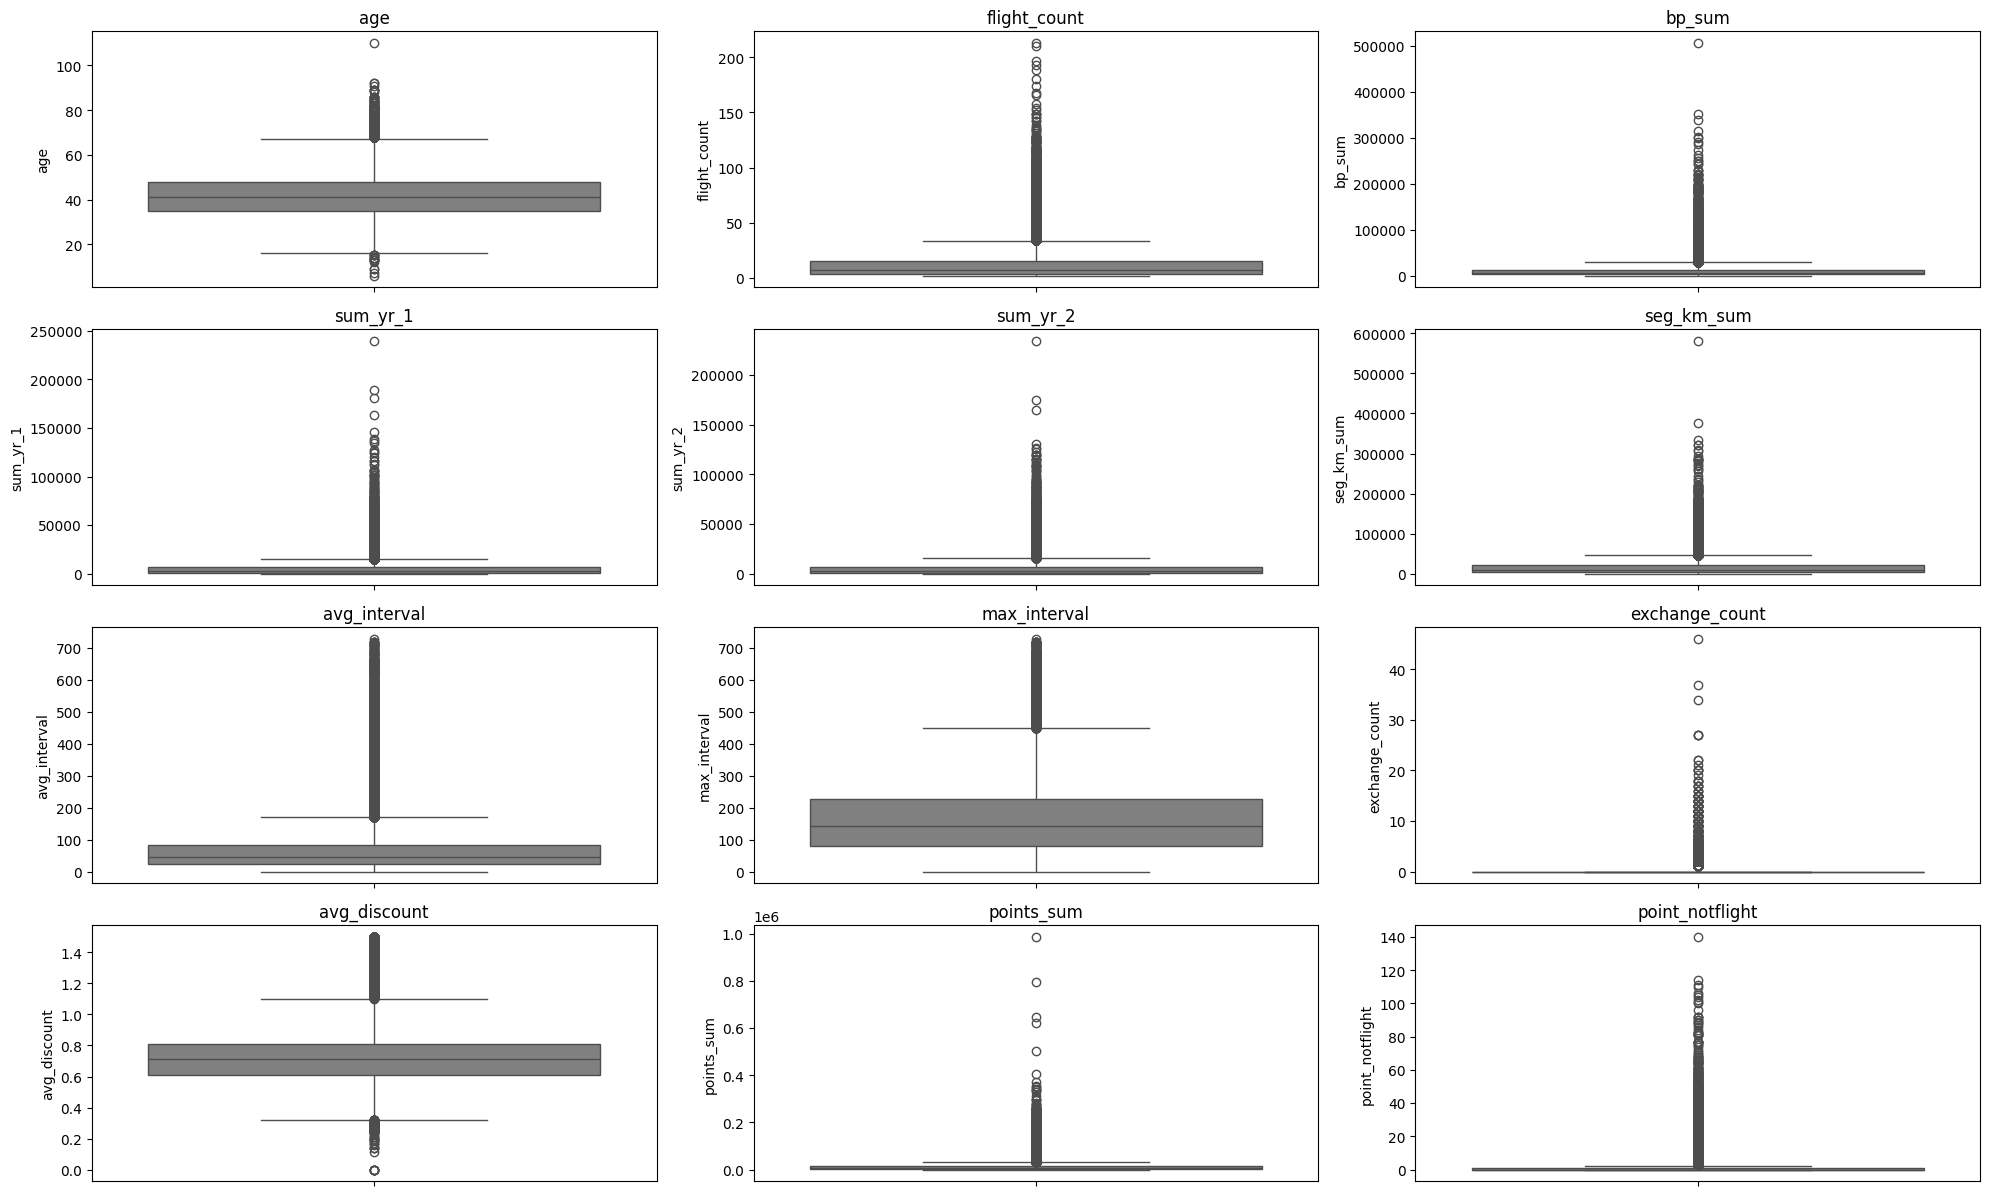

In [ ]:
# Menentukan ukuran figure secara keseluruhan
plt.figure(figsize=(20, 15))

for i in range(len(numerical)):
    plt.subplot(len(numerical) // 3 + 1, 3, i + 1)  # Mengatur subplot menjadi beberapa baris
    sns.boxplot(y=df[numerical[i]], color='gray', orient='v')
    plt.title(numerical[i])  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

semua kolom terdapat outlir dan hampir semua kolom memiliki outliers yang signifikan, dibiarkan saja atau dihilangkan?

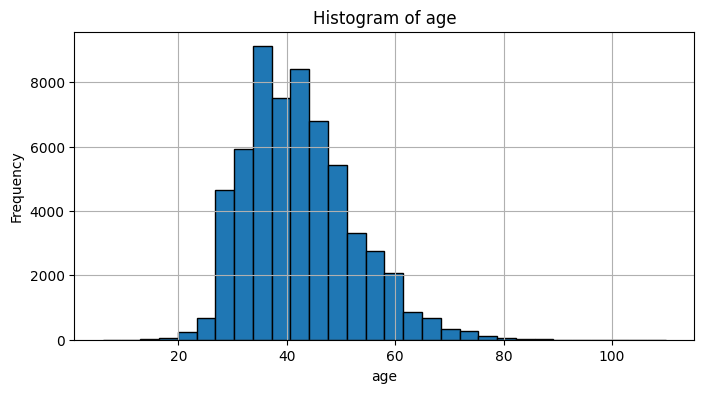

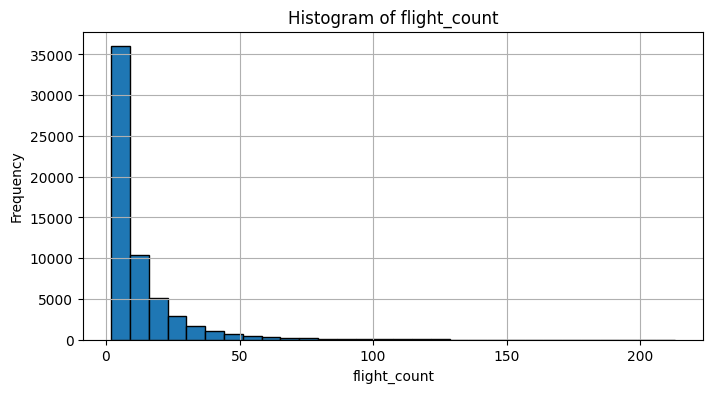

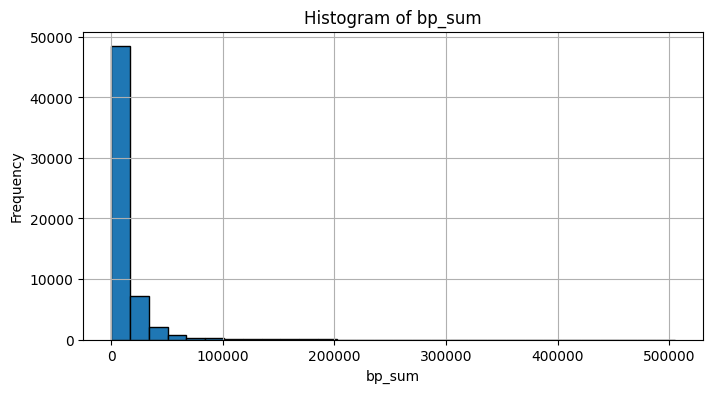

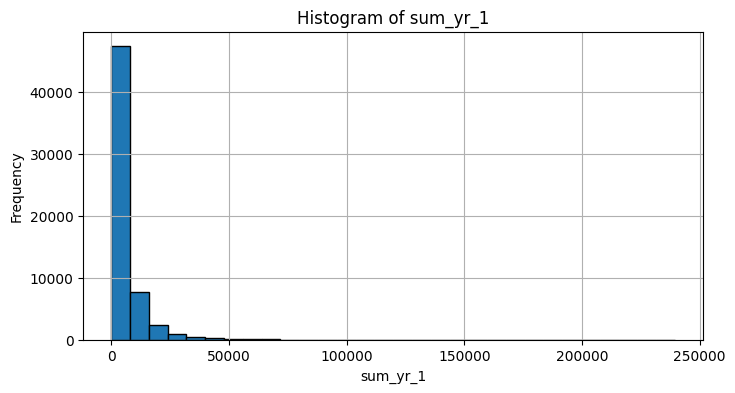

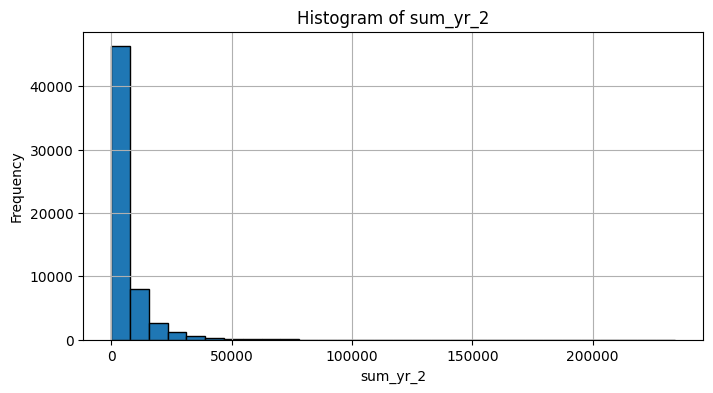

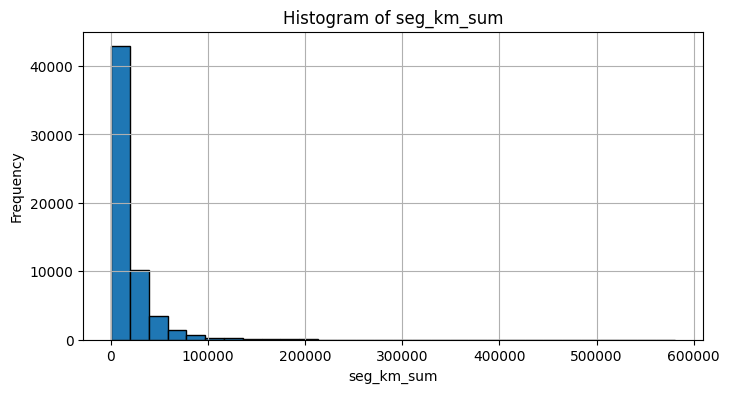

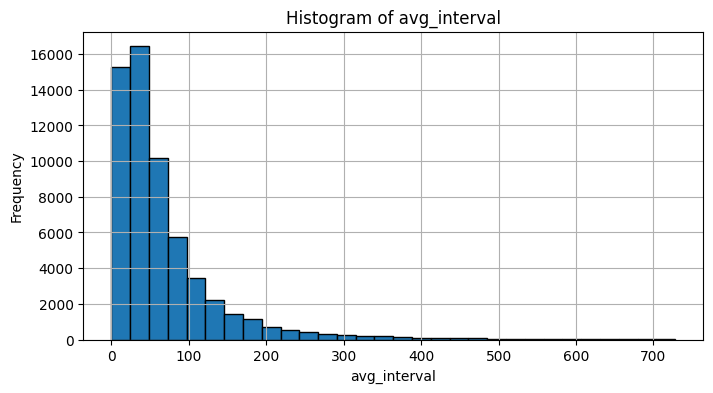

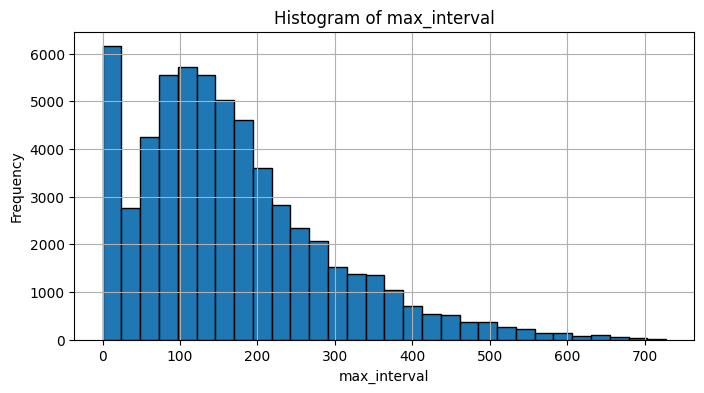

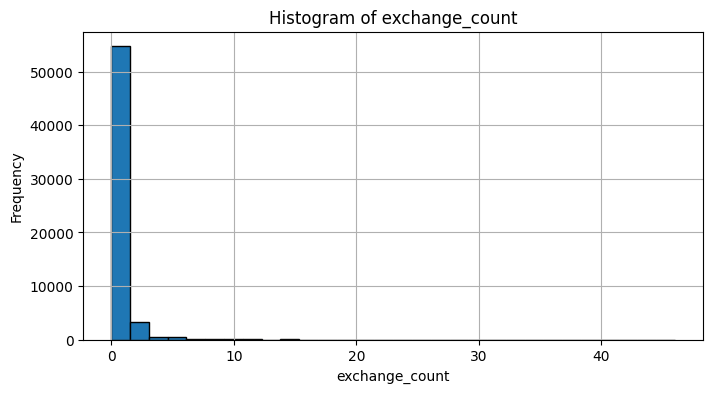

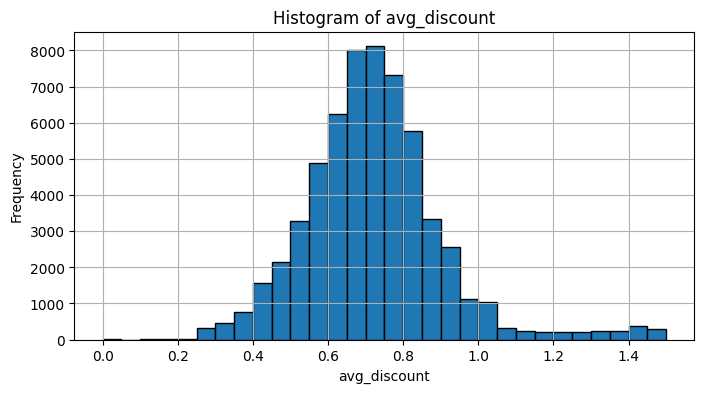

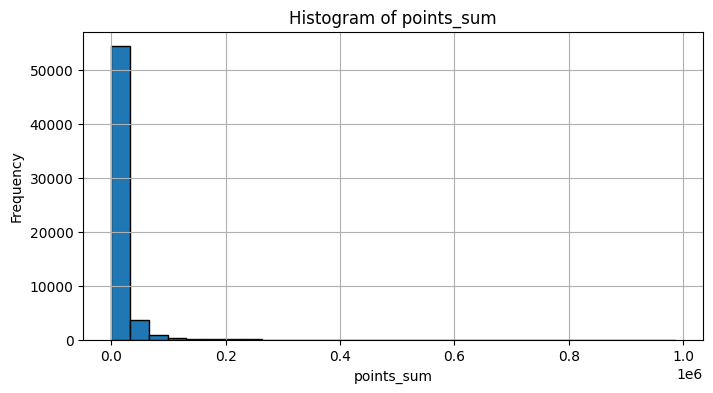

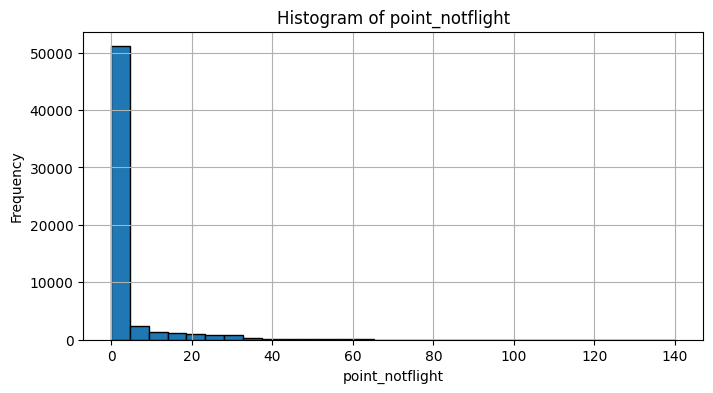

In [ ]:
# Menampilkan histogram untuk setiap kolom numerik
for col in numerical:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.grid(True)
    plt.show()

1. Kolom Age dan Kolom Avg Discount: Distribusi data terlihat normal, menunjukkan bahwa data terdistribusi merata di sekitar nilai rata-rata.

2. Kolom lainnya cenderung skew kanan, menunjukkan bahwa mayoritas nilai berada di sisi yang lebih rendah, dengan sedikit nilai yang sangat tinggi yang jarang muncul.

#Cek korelasi

In [ ]:
#seperate numerical and categorical feature

df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

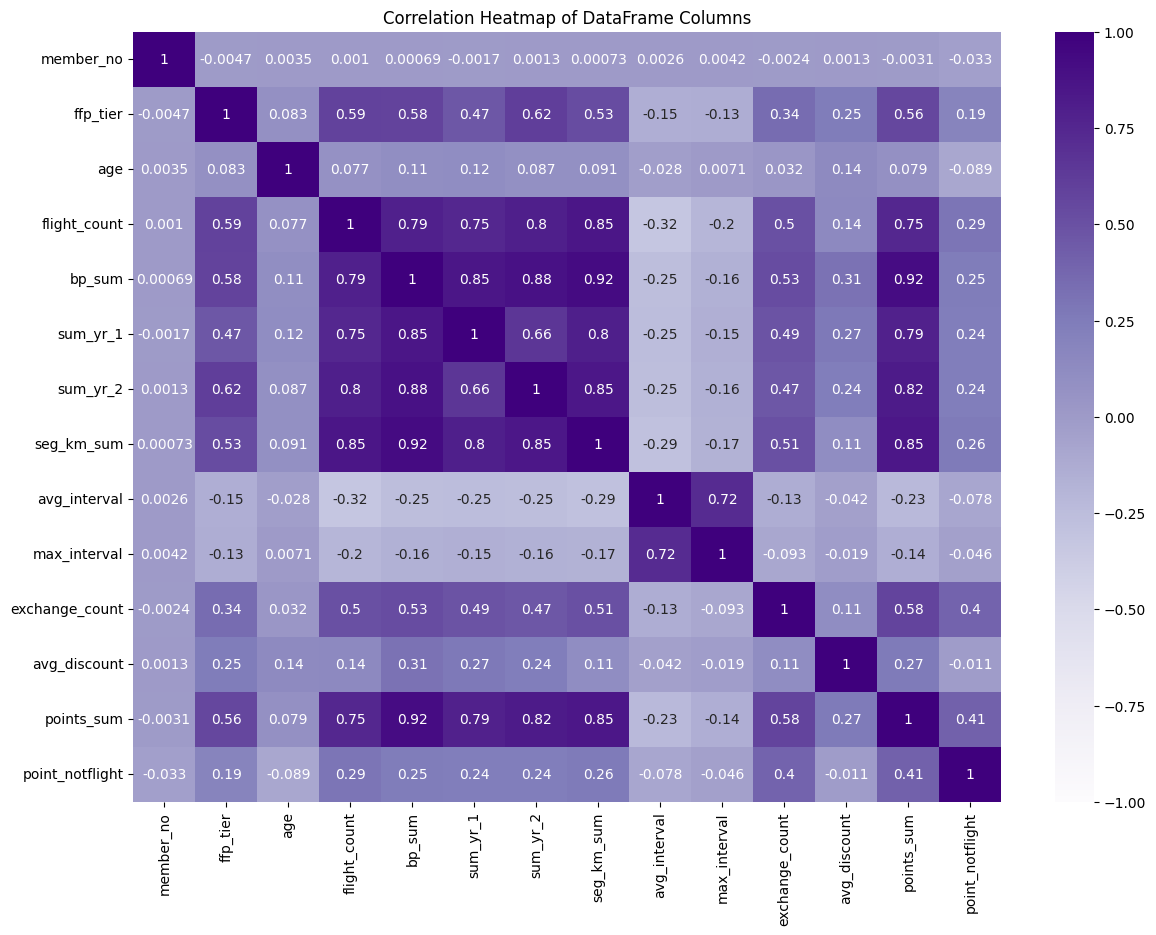

In [ ]:
#Correlation between column
corr_matrix = df_num.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

kolom-kolom yang memiliki korelasi yang kuat :
1. bp_sum dengan point_sum (0,92)
2. points_sum dengan sum_yr_2 (0,82)
3. points_sum dengan seg_km_sum (0,85)
4. seg_kum_sum dengan bp_sum (0,92)
5. flight_count dengan seg_kum_sum (0,85)
6. sum_yr_2 dengan seg_kum_sum (0,85)
7. sum_yr_2 dengan bp_sum (0,88)

# Pre-Processing

## Standarisasi data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df[numerical].describe()

,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,59295.00000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000,59295.000000
mean,42.31802,11.989139,11050.126048,5368.400894,5665.457998,17316.000978,68.061508,167.243680,0.326014,0.721344,12708.860275,2.790741
std,9.81902,14.180322,16363.784481,8109.157744,8707.412899,21058.522187,77.681905,123.046014,1.145301,0.184281,20638.388895,7.458378
min,6.00000,2.000000,0.000000,0.000000,0.000000,368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.00000,3.000000,2595.000000,1020.000000,828.000000,4866.500000,23.682105,81.000000,0.000000,0.612740,2853.000000,0.000000
50%,41.00000,7.000000,5814.000000,2806.000000,2822.000000,10189.000000,44.888889,144.000000,0.000000,0.711913,6460.000000,0.000000
75%,48.00000,15.000000,12987.500000,6592.000000,6909.000000,21500.000000,82.250000,228.000000,0.000000,0.808890,14480.500000,1.000000
max,110.00000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [ ]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit transformasi pada data
df[numerical] = scaler.fit_transform(df[numerical])

In [ ]:
df[numerical].describe()

,age,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04,5.929500e+04
mean,9.682410e-17,8.436160e-17,2.300771e-17,-7.669236e-18,-2.300771e-17,4.601542e-17,-1.840617e-16,-9.203083e-17,-1.917309e-17,-2.684233e-16,7.669236e-17,7.189909e-18
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.698773e+00,-7.044426e-01,-6.752851e-01,-6.620227e-01,-6.506532e-01,-8.048116e-01,-8.761639e-01,-1.359208e+00,-2.846559e-01,-3.914405e+00,-6.157926e-01,-3.741785e-01
25%,-7.452965e-01,-6.339218e-01,-5.167018e-01,-5.362379e-01,-5.555610e-01,-5.911909e-01,-5.713013e-01,-7.009118e-01,-2.846559e-01,-5.893465e-01,-4.775539e-01,-3.741785e-01
50%,-1.342325e-01,-3.518383e-01,-3.199853e-01,-3.159912e-01,-3.265588e-01,-3.384407e-01,-2.983039e-01,-1.889039e-01,-2.846559e-01,-5.118024e-02,-3.027810e-01,-3.741785e-01
75%,5.786756e-01,2.123285e-01,1.183950e-01,1.508923e-01,1.428154e-01,1.986860e-01,1.826501e-01,4.937733e-01,-2.846559e-01,4.750680e-01,8.584268e-02,-2.401000e-01
max,6.893004e+00,1.417546e+01,3.020463e+01,2.888014e+01,2.624482e+01,2.675429e+01,8.495467e+00,4.557328e+00,3.987979e+01,4.225408e+00,4.713892e+01,1.839682e+01


# Feature Engineering

# Cek Multikolinearitas

In [ ]:
#Karena sebelumnya terdapat fitur dengan korelasi tinggi akan dicek terlebih dahulu multikolinearitas kedua fitur tersebut
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Menghitung VIF
X = df[['bp_sum', 'seg_km_sum']]
X = np.column_stack([np.ones(X.shape[0]), X])

# Menghitung VIF untuk setiap variabel
vif_data = pd.DataFrame()
vif_data["feature"] = ['Intercept', 'bp_sum', 'seg_km_sum']
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)

      feature       VIF
0   Intercept  1.000000
1      bp_sum  6.712518
2  seg_km_sum  6.712518


Karena $5 < VIF=6.712518 < 10$, maka terdapat multikolinearitas sedang antara fitur **bp_sum** dengan **seg_km_sum**. Dengan demikian, untuk membuat estimasi yang lebih baik perlu dilakukan handling terhadap 2 variabel ini. Terutama pada fitur bp_sum yang mana memiliki 2 korelasi tinggi, yaitu terhadap **seg_km_sum** dan **points_sum** yang mana kurang lebih nilai VIFnya serupa dengan ini. Dengan demikian, fitur bp_sum akan dihilangkan dalam pemodelan.

In [ ]:
df = df.drop(columns=['bp_sum'])

## Fitur Tambahan

### Engagement Score

engagement_score= flight_count+seg_km_sum+
avg_interval+ max_interval

In [ ]:
df['engagement_score']=df['flight_count']+df['seg_km_sum']+(1/df['avg_interval'])+(1/df['max_interval'])

In [ ]:
df['1_per_avg_interval']=1 / df['avg_interval']
df['1_per_max_interval']=1 / df['max_interval']

In [ ]:
korelasi=pd.DataFrame(df[['engagement_score','flight_count', 'seg_km_sum', 'avg_interval', 'max_interval']].corr())

In [ ]:
korelasi

,engagement_score,flight_count,seg_km_sum,avg_interval,max_interval
engagement_score,1.000000,0.023749,0.024335,0.017581,0.030494
flight_count,0.023749,1.000000,0.851578,-0.322242,-0.199257
seg_km_sum,0.024335,0.851578,1.000000,-0.286839,-0.166009
avg_interval,0.017581,-0.322242,-0.286839,1.000000,0.723966
max_interval,0.030494,-0.199257,-0.166009,0.723966,1.000000


In [ ]:
kor_fitur = 0.024385 + 0.025602 + 0.019072 + 0.032965

In [ ]:
bobot = korelasi.div(kor_fitur, axis='index')

In [ ]:
bobot

,engagement_score,flight_count,seg_km_sum,avg_interval,max_interval
engagement_score,9.801615,0.232783,0.238524,0.172324,0.298889
flight_count,0.232783,9.801615,8.346840,-3.158491,-1.953040
seg_km_sum,0.238524,8.346840,9.801615,-2.811483,-1.627157
avg_interval,0.172324,-3.158491,-2.811483,9.801615,7.096033
max_interval,0.298889,-1.953040,-1.627157,7.096033,9.801615


In [ ]:
df['engagement_score']=0.232783*df['flight_count']+0.238524	*df['seg_km_sum']+0.172324*df['1_per_avg_interval']+0.298889*df['1_per_max_interval']

### Loyalty Index

loyalty_index=ffp_tier+membership_duration+points_sum+last_flight_recency

In [ ]:
df['membership_duration'] = (pd.to_datetime('today') - pd.to_datetime(df['ffp_date'])).dt.days
df['last_flight_recency'] = (pd.to_datetime('today') - pd.to_datetime(df['last_flight_date'])).dt.days

df['loyalty_index'] = df['ffp_tier'] + df['membership_duration'] + df['points_sum']  - df['point_notflight'] - df['last_flight_recency']


In [ ]:
korelasi_loyalty=df[['loyalty_index','ffp_tier','membership_duration','points_sum','point_notflight','last_flight_recency']].corr()
korelasi_loyalty

,loyalty_index,ffp_tier,membership_duration,points_sum,point_notflight,last_flight_recency
loyalty_index,1.000000,0.163360,0.978920,0.228294,0.117711,-0.324129
ffp_tier,0.163360,1.000000,0.125863,0.560721,0.194013,-0.206917
membership_duration,0.978920,0.125863,1.000000,0.176016,0.097499,-0.124083
points_sum,0.228294,0.560721,0.176016,1.000000,0.409607,-0.289893
point_notflight,0.117711,0.194013,0.097499,0.409607,1.000000,-0.123350
last_flight_recency,-0.324129,-0.206917,-0.124083,-0.289893,-0.123350,1.000000


In [ ]:
absolute_korelasi_loyalty= korelasi_loyalty.abs()
absolute_korelasi_loyalty

,loyalty_index,ffp_tier,membership_duration,points_sum,point_notflight,last_flight_recency
loyalty_index,1.000000,0.163360,0.978920,0.228294,0.117711,0.324129
ffp_tier,0.163360,1.000000,0.125863,0.560721,0.194013,0.206917
membership_duration,0.978920,0.125863,1.000000,0.176016,0.097499,0.124083
points_sum,0.228294,0.560721,0.176016,1.000000,0.409607,0.289893
point_notflight,0.117711,0.194013,0.097499,0.409607,1.000000,0.123350
last_flight_recency,0.324129,0.206917,0.124083,0.289893,0.123350,1.000000


In [ ]:
kor_loyalty=0.163360+0.978920+0.228294+0.117711+0.324129

In [ ]:
bobot_loyalty = absolute_korelasi_loyalty/ kor_loyalty
bobot_loyalty

,loyalty_index,ffp_tier,membership_duration,points_sum,point_notflight,last_flight_recency
loyalty_index,0.551750,0.090134,0.540119,0.125961,0.064947,0.178838
ffp_tier,0.090134,0.551750,0.069445,0.309378,0.107047,0.114166
membership_duration,0.540119,0.069445,0.551750,0.097117,0.053795,0.068463
points_sum,0.125961,0.309378,0.097117,0.551750,0.226001,0.159949
point_notflight,0.064947,0.107047,0.053795,0.226001,0.551750,0.068059
last_flight_recency,0.178838,0.114166,0.068463,0.159949,0.068059,0.551750


In [ ]:
df['loyalty_index'] = 0.090134*df['ffp_tier'] + 0.540119*df['membership_duration'] + 0.125961*df['points_sum']  - 0.064947*df['point_notflight'] - 0.178838*df['last_flight_recency']

## Feature Selection

In [ ]:
numerical=['sum_yr_1','sum_yr_2','exchange_count','avg_discount','engagement_score','loyalty_index']

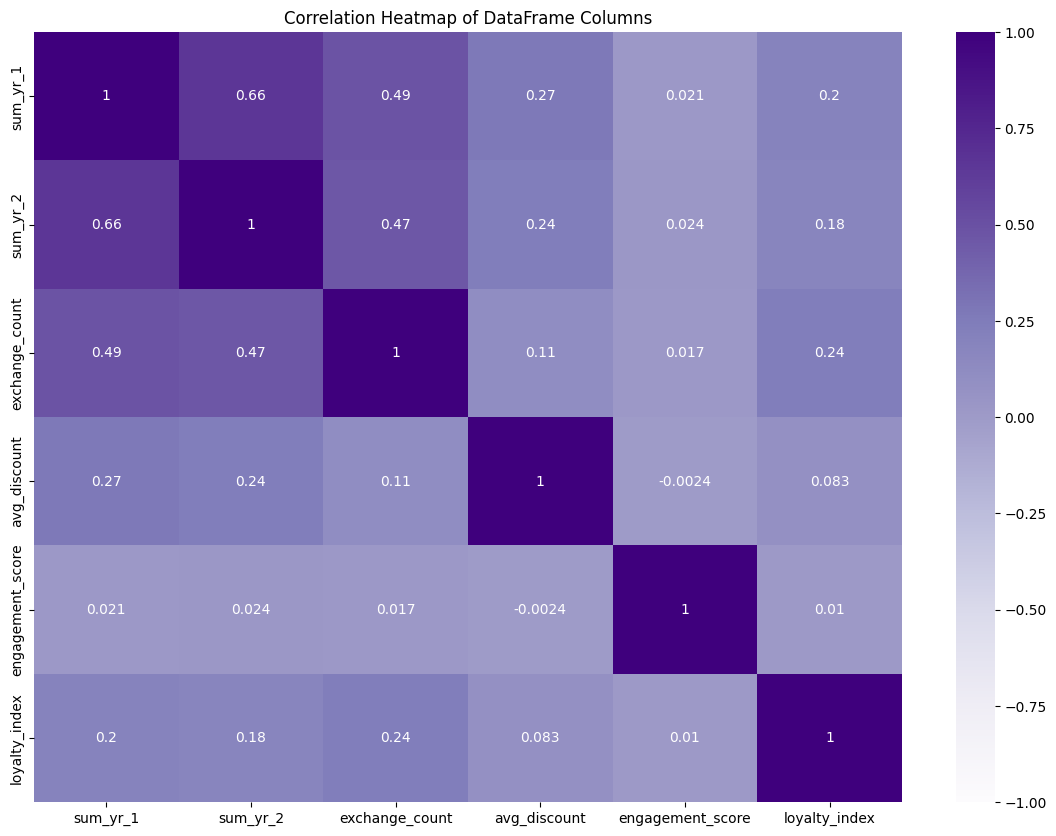

In [ ]:
#Correlation between column
corr_matrix = df[numerical].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()